In [49]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [50]:
folder = '/Users/natapost/Documents/ultan_files/pl/logs_to_csv'
file_names = os.listdir(folder)
participants = []
for f in file_names:
    print(f)
    if f[0] != '.' and f[0] != 'd':
        participants.append(f[:2])

08.csv
09.csv
16.csv
02.csv
03.csv
01.csv
15.csv
04.csv
10.csv
11.csv
05.csv
13.csv
07.csv
06.csv
12.csv
difficult_ams.csv


In [51]:
df = pd.read_csv(folder + '/' + file_names[3])
#df['mov_avg20'] = df.groupby('stage')['correct'].transform(lambda x: x.rolling(window = 20).mean())
df

,Unnamed: 0,time_stimuli_start,time_space,timestamp_stimuli_start,timestamp_key_pressed,RT,relevant_modality,stage,trial_n,go,key_pressed,correct
0,0,28.7271,NaN,1.683538e+09,NaN,NaN,VIS,training,1,True,False,0
1,1,30.9617,31.7311,1.683538e+09,1.683538e+09,0.7694,VIS,training,2,True,True,1
2,2,33.2328,NaN,1.683538e+09,NaN,NaN,VIS,training,3,False,False,1
3,3,35.4466,NaN,1.683538e+09,NaN,NaN,VIS,training,4,False,False,1
4,4,37.5323,37.6056,1.683538e+09,1.683538e+09,0.0733,VIS,training,5,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,235,571.2207,NaN,1.683543e+09,NaN,NaN,VIS,eds2,56,False,False,1
1196,236,573.2919,573.8009,1.683543e+09,1.683543e+09,0.5090,VIS,eds2,57,True,True,1
1197,237,575.7012,NaN,1.683543e+09,NaN,NaN,VIS,eds2,58,False,False,1
1198,238,577.9811,NaN,1.683543e+09,NaN,NaN,VIS,eds2,59,False,False,1


ams1
ams2
eds1
learned_point 1


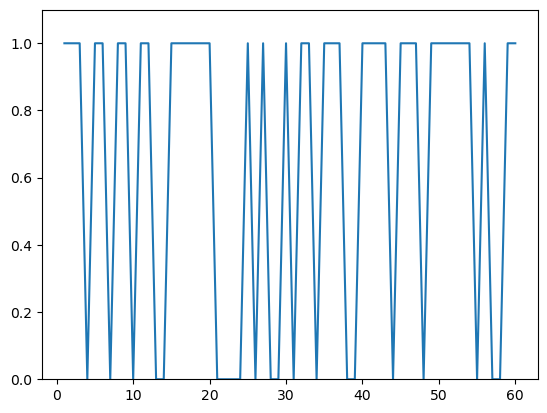

eds2
learned_point 1


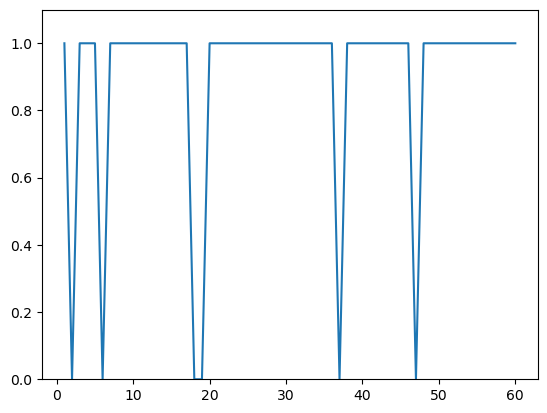

ids1
learned_point 4


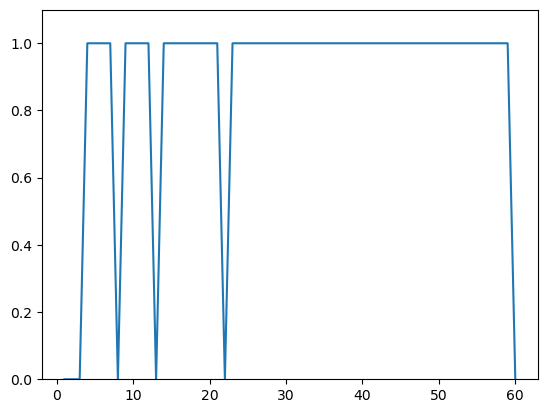

ids2
learned_point 1


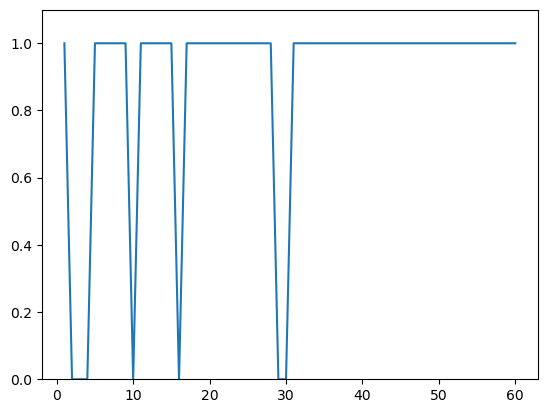

staircase1
staircase2
training


In [52]:
window_size = 1
df['moving_avg'] = df.groupby('stage')['correct'].transform(lambda x: x.rolling(window = window_size).mean())

stage_indeces = []
stage = ''
for index,row in df.iterrows():
    if row.stage != stage:
        stage = row.stage
        new_index = 1
    else:
        new_index = new_index + 1
    stage_indeces.append(new_index)
df['stage_trial'] = stage_indeces

df_temp = pd.DataFrame() 
for stage, group in df.groupby('stage'):   
    print(stage)
    stages = ['ids1', 'eds1', 'ids2', 'eds2']
    if stage in stages:
        learned_point = group.loc[group['moving_avg'] >= 0.8, 'stage_trial'].iloc[0]
        print('learned_point', learned_point)
        #print(group)
        plt.plot(group['stage_trial'], group['moving_avg'])
        plt.ylim(0,1.1)
        plt.show()

In [93]:
column_names = ['participant', 'ids1', 'ams1', 'eds1', 'ids2', 'ams2', 'eds2']
learning_points = pd.DataFrame(columns=column_names)

df_temp = pd.DataFrame(np.nan, index = range(1), columns=column_names)
for stage, group in df.groupby('stage'): 
    stages = ['ids1', 'ams1', 'eds1', 'ids2', 'ams2', 'eds2']
    if stage in stages:
        learned_point = group.loc[group['moving_avg'] >= 0.8, 'stage_trial'].iloc[0]
        df_temp[stage] = learned_point
print(df_temp)

   participant  ids1  ams1  eds1  ids2  ams2  eds2
0          NaN    20    54    55    20    20    20


In [31]:
column_names = ['participant', 'ids1', 'eds1', 'ids2', 'eds2', 'shift_cost1', 'shift_cost2', 'om_ids1', 'om_eds1', 'om_ids2', 'om_eds2', 'ch_ids1', 'ch_eds1', 'ch_ids2', 'ch_eds2', 'fa_ids1', 'fa_eds1', 'fa_ids2', 'fa_eds2','cr_ids1', 'cr_eds1', 'cr_ids2', 'cr_eds2']
# om - ommisions
# ch - correct hit
# fa - falce alarm
# cr - correct rejection
learning_points = pd.DataFrame(columns=column_names)

stages = ['ids1', 'eds1', 'ids2', 'eds2']
skip_list = ['08.csv', '01.csv', '11.csv', '12.csv', 'difficult_ams.csv']
#skip_list = []

window_size = 10

for f in file_names:
    if f[0] == '.' or f in skip_list:
        continue
    print('file:', f)
    
    df = pd.read_csv(folder + '/' + f)
    df['mov_avg'] = df.groupby('stage')['correct'].transform(lambda x: x.rolling(window = window_size).mean())
    stage_indeces = []
    stage = ''
    for index,row in df.iterrows():
        if row.stage != stage:
            stage = row.stage
            new_index = 1
        else:
            new_index = new_index + 1
        stage_indeces.append(new_index)
    df['stage_trial'] = stage_indeces
    

    df_temp = pd.DataFrame(np.nan, index = range(1), columns=column_names)
    df_temp.participant = int(f[:2])
    for stage, group in df.groupby('stage'): 
        #print(stage)
        if stage in stages:
            #print(stage)
            #print(group)
            learned_point = group.loc[group['mov_avg'] >= 0.8, 'stage_trial'].iloc[0]
            df_temp[stage] = learned_point
            #print(' df_temp')
            #print(df_temp)
    learning_points = pd.concat([learning_points, df_temp], ignore_index = True)
    #print('learning_points')


learning_points['shift_cost1'] = learning_points['eds1'] - learning_points['ids1']
learning_points['shift_cost2'] = learning_points['eds2'] - learning_points['ids2']

print(learning_points)

file: 09.csv
file: 16.csv
file: 02.csv
file: 03.csv
file: 15.csv
file: 04.csv
file: 10.csv
file: 05.csv
file: 13.csv
file: 07.csv
file: 06.csv
   participant ids1 eds1 ids2 eds2 shift_cost1 shift_cost2 ommission  \
0            9   10   48   10   12          38           2       NaN   
1           16   10   10   11   11           0           0       NaN   
2            2   12   20   13   10           8          -3       NaN   
3            3   10   10   25   10           0         -15       NaN   
4           15   12   10   10   10          -2           0       NaN   
5            4   19   37   12   10          18          -2       NaN   
6           10   10   21   11   10          11          -1       NaN   
7            5   10   17   20   23           7           3       NaN   
8           13   13   27   10   11          14           1       NaN   
9            7   10   11   10   10           1           0       NaN   
10           6   10   18   10   10           8           0       

In [119]:
difficulty_df = pd.read_csv(folder + '/' + 'difficult_ams.csv', index_col = 0)
difficulty_df

,participant,difficult_ams
0,1,ams1
1,2,ams2
2,3,ams2
3,4,ams1
4,5,ams2
5,6,ams2
6,7,ams2
7,8,ams2
8,9,ams1
9,10,ams2


In [33]:
merged_df = pd.merge(learning_points, df, on='participant', how='inner')
merged_df

,participant,ids1,eds1,ids2,eds2,shift_cost1,shift_cost2,ommission,correct_hit,false_alarm,corr_reject,difficult_ams
0,9,10,48,10,12,38,2,NaN,NaN,NaN,NaN,ams1
1,16,10,10,11,11,0,0,NaN,NaN,NaN,NaN,ams1
2,2,12,20,13,10,8,-3,NaN,NaN,NaN,NaN,ams2
3,3,10,10,25,10,0,-15,NaN,NaN,NaN,NaN,ams2
4,15,12,10,10,10,-2,0,NaN,NaN,NaN,NaN,ams1
5,4,19,37,12,10,18,-2,NaN,NaN,NaN,NaN,ams1
6,10,10,21,11,10,11,-1,NaN,NaN,NaN,NaN,ams2
7,5,10,17,20,23,7,3,NaN,NaN,NaN,NaN,ams2
8,13,13,27,10,11,14,1,NaN,NaN,NaN,NaN,ams1
9,7,10,11,10,10,1,0,NaN,NaN,NaN,NaN,ams2


In [41]:
import scipy.stats as stats

group1 = list(merged_df[merged_df['difficult_ams'] =='ams1']['shift_cost1'])
group2 = list(merged_df[merged_df['difficult_ams'] =='ams2']['shift_cost1'])

statistic, p_value = stats.mannwhitneyu(group1, group2)

alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference between the two groups.")

print(f"Mann-Whitney U Statistic: {statistic}")
print(f"P-Value: {p_value}")

Fail to reject the null hypothesis: There is no statistically significant difference between the two groups.
Mann-Whitney U Statistic: 18.5
P-Value: 0.5821621025882134


In [85]:
# om - ommisions
# ch - correct hit
# fa - falce alarm
# cr - correct rejection

def getOutcomes(go, key_pressed):
    om = 0
    ch = 0
    fa = 0
    cr = 0
    if go:
        if key_pressed:
            ch = 1
        else:
            om = 1
    else:
        if key_pressed:
            fa = 1
        else:
            cr = 1
    
    return om, ch, fa, cr

def getOutcomes(go, key_pressed):
    om = 0
    ch = 0
    fa = 0
    cr = 0
    if go:
        if key_pressed:
            ch = 1
        else:
            om = 1
    else:
        if key_pressed:
            fa = 1
        else:
            cr = 1
    
    return om, ch, fa, cr

def res_to_lists(lists,om,ch,fa,cr):
    lists[0] += om
    lists[1] += ch
    lists[2] += fa
    lists[3] += cr
    
    return lists


    
    

In [124]:
columns = ['ids1_om', 'eds1_om', 'ids2_om', 'eds2_om', 
           'ids1_fa', 'eds1_fa', 'ids2_fa', 'eds2_fa', 
           'ids1_ch', 'eds1_ch', 'ids2_ch', 'eds2_ch',
           'ids1_cr', 'eds1_cr', 'ids2_cr', 'eds2_cr']

outcomes_df = pd.DataFrame()
initiate = True
for column in columns:
    #print(column)
    stage = column.split('_')[0]
    outcome = column.split('_')[1]
    #print(stage, outcome)
    participants = []
    counts = []
    for f in file_names:
        if f[0] == '.' or f in skip_list:
            continue
        #print('file:', f)
    
        df = pd.read_csv(folder + '/' + f)
        participants.append(int(f[:2]))
                           
        df_stage = df.groupby('stage')
        for group_key, group in df.groupby('stage'):
            #print(group_key)
            if group_key == stage:
                #print('calculating!')
                count = 0
                
                for index, row in group.iterrows():
                    go = row.go
                    key_pressed = row.key_pressed
                    om, ch, fa, cr = getOutcome(go, key_pressed)
                
                    if outcome == 'om':
                        count += om
                    elif outcome == 'ch':
                        count += ch
                    elif outcome == 'fa':
                        count += fa
                    elif outcome == 'cr':
                        count += cr
                    else:
                        print('MISTAKE')
                        break
                
        #print(count)
        counts.append(count)
        #break
    if initiate:
        outcomes_df = pd.DataFrame()
        outcomes_df['participant'] = participants
        outcomes_df[column] = counts
        initiate = False
    else:
        df = pd.DataFrame()
        df['participant'] = participants
        df[column] = counts
        outcomes_df = pd.merge(outcomes_df, df, on='participant', how = 'left')   


In [125]:
outcomes_df = pd.merge(outcomes_df, difficulty_df, on = 'participant', how = 'left')       
outcomes_df

,participant,ids1_om,eds1_om,ids2_om,eds2_om,ids1_fa,eds1_fa,ids2_fa,eds2_fa,ids1_ch,eds1_ch,ids2_ch,eds2_ch,ids1_cr,eds1_cr,ids2_cr,eds2_cr,difficult_ams
0,9,8,15,0,2,5,16,2,5,22,15,30,28,25,14,28,25,ams1
1,16,1,0,0,0,2,2,4,3,29,30,30,30,28,28,26,27,ams1
2,2,3,12,2,1,4,9,5,5,27,18,28,29,26,21,25,25,ams2
3,3,0,18,9,0,0,12,15,2,30,12,51,30,30,18,45,28,ams2
4,15,2,0,0,0,2,3,2,0,28,30,30,30,28,27,28,30,ams1
5,4,4,9,1,1,9,12,3,2,26,21,29,29,21,18,27,28,ams1
6,10,0,2,2,2,3,7,1,6,30,28,28,28,27,23,29,24,ams2
7,5,9,9,4,4,1,9,5,4,21,21,26,26,29,21,25,26,ams2
8,13,2,3,1,1,3,8,1,3,28,27,29,29,27,22,29,27,ams1
9,7,1,1,1,0,1,2,3,2,29,29,29,30,29,28,27,28,ams2


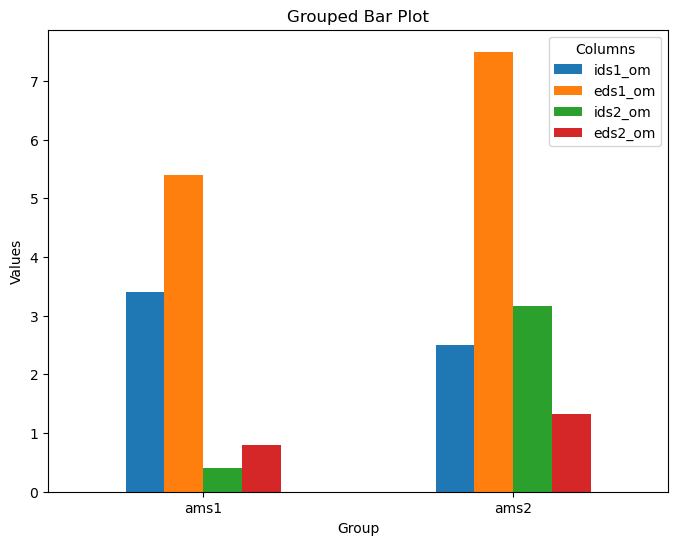

In [130]:
# Group the data by the "Group" column and calculate the mean of each column within each group
sub_df = outcomes_df[['ids1_om', 'eds1_om', 'ids2_om', 'eds2_om', 'difficult_ams']]
grouped = sub_df.groupby("difficult_ams").mean()

# Plot the grouped bar plot
ax = grouped.plot(kind="bar", rot=0, figsize=(8, 6))

# Add labels and a legend
plt.xlabel("Group")
plt.ylabel("Values")
plt.title("Grouped Bar Plot")
plt.legend(title="Columns", loc="upper right")

# Show the plot
plt.show()


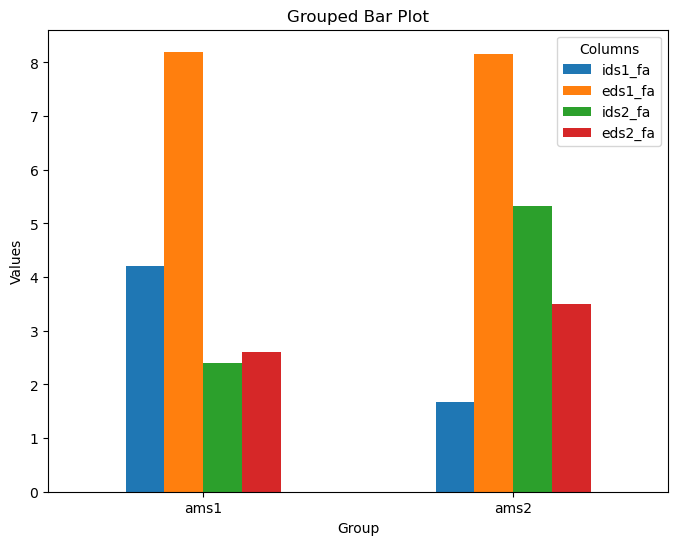

In [131]:
# Group the data by the "Group" column and calculate the mean of each column within each group
sub_df = outcomes_df[['ids1_fa', 'eds1_fa', 'ids2_fa', 'eds2_fa', 'difficult_ams']]
grouped = sub_df.groupby("difficult_ams").mean()

# Plot the grouped bar plot
ax = grouped.plot(kind="bar", rot=0, figsize=(8, 6))

# Add labels and a legend
plt.xlabel("Group")
plt.ylabel("Values")
plt.title("Grouped Bar Plot")
plt.legend(title="Columns", loc="upper right")

# Show the plot
plt.show()